# Sistemas Inteligentes

## Exercício Computacional 2 - Classificação

Preencha todas as células adequadamente e responda todas as perguntas de forma completa e elaborada.

### Identificação do Aluno

#### Nome Completo

Gabriel Sponda Freitas Bettarello

#### RA

11201932580

### Instruções

Treine e teste um classificador à sua escolha utilizando a base de dados **Olivetti Faces** (veja as referências).

Faça um caso com com *k-Fold* e um caso de forma direta, ou seja, utilizando o *train_test_split*.

Exiba a acurácia e a *Confusion Matrix*, então discuta sobre o desempenho do classificador para os dois casos.

Entre as células de códigos, insira células de tipo *Markdown* para fornecer explicações sobre os passos realizados; não insira apenas códigos "soltos" sem explicação.

Dica: desta vez, estamos lidando com uma quantidade relativamente grande de classes, então pode ser interessante exibir a *Confusion Matrix* utilizando escala de cinza para representar os valores de cada célula da matriz; para fazer isso, prefira utilizar a função **imshow** com o mapa de cores (argumento **cmap**) do tipo **'Greys'**.

**EXTRA**: tente fazer um caso com *Bootstrap* em vez de *k-Fold*, então comente sobre o método e os resultados.

## Desenvolvimento

### Importação e preparação dos dados

Vamos importar o pacote **datasets** da biblioteca **sklearn**, então carregar o dataset **Olivetti Faces**, utilizando a função **fetch_olivetti_faces()** do pacote de datasets importado, já atribuindo-o à variável **faces_dataset**.

In [ ]:
from sklearn import datasets

faces_dataset = datasets.fetch_olivetti_faces()

A variável **faces_dataset** contem todo o dataset correspondente, inclusive com informações que não são de nosso interesse. Para selecionar apenas o que é de nosso interesse, vamos atribuir à variável **faces_img** apenas o objeto **images** de **faces_dataset**.

Vamos utlizar a função **reshape** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

Então, vamos atribuir o objeto **target** de **faces_dataset** à variável **faces_target**.

In [ ]:
faces_img = faces_dataset.images
faces_img_reshaped = faces_img.reshape(faces_img.shape[0], -1)
faces_target = faces_dataset.target

### Divisão dos dados em grupos para treinamento e teste.

Vamos primeiro fazer um caso de forma direta.

Vamos importar e utilizar a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **faces** e **faces_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Vamos separar 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(faces_img_reshaped, faces_target, test_size = 0.25, random_state = 28)

### Treinamento

Vamos utilizar Artificial Neural Networks (ANN).

Vamos importar a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então criar o classificador **ANN** usando a função importada com os parâmetros **solver='lbfgs'** e **hidden_layer_sizes=(100)**.

Depois, treinar o classificador usando os dados de entrada e saída de treinamento.

In [ ]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier(hidden_layer_sizes=100, solver='lbfgs')
ANN = ANN.fit(x_train, y_train)

### Classificação e Resultados

Vamos importar as funções **accuracy_score** e **confusion_matrix**, então vamos fazer a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprimir a acurácia e a matriz de confusão dessa classificação.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = ANN.predict(x_test)
print(accuracy_score(y_test, y_pred))
direct_confusion_matrix = confusion_matrix(y_test, y_pred)

0.81


### Treinamento e Classificação e Resultados com k-Fold

Vamos agora realizar uma validação cruzada k-Fold em vez de uma única divisão treinamento/teste. Para isso, iremos importar a função **KFold** do pacote **model_selection** da biblioteca **sklearn**.

A validação cruzada k-Fold é uma técnica que divide os dados em k partes, ou 'dobras', e treina/testa o modelo k vezes. Em cada iteração, uma parte diferente é usada como conjunto de teste, enquanto as demais partes são usadas como conjuntos de treinamento.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=28)

accuracies_kf = []
average_confusion_matrix_kf = np.zeros((40, 40), dtype=int)

for train_index, test_index in kf.split(faces_img_reshaped):
  x_train, x_test = faces_img_reshaped[train_index], faces_img_reshaped[test_index]
  y_train, y_test = faces_target[train_index], faces_target[test_index]

  ANN = MLPClassifier(hidden_layer_sizes=100, solver='lbfgs')
  ANN = ANN.fit(x_train, y_train)

  y_pred = ANN.predict(x_test)
  accuracies_kf.append(accuracy_score(y_test, y_pred))
  average_confusion_matrix_kf += confusion_matrix(y_test, y_pred, labels=np.arange(40))

print(np.mean(accuracies_kf))
average_confusion_matrix_kf = average_confusion_matrix_kf / 5

0.8425


### Treinamento e Classificação e Resultados com Bootstrap

O bootstrap é uma técnica de reamostragem amplamente utilizada em estatísticas e aprendizado de máquina. Envolve a seleção aleatória com substituição de observações dos seus dados para criar conjuntos de dados fictícios. Esses conjuntos fictícios são usados para estimar estatísticas, avaliar modelos e entender a variabilidade dos dados.

A cada 5 iterações, o código realiza a reamostragem (bootstrap) dos dados, criando conjuntos de treinamento e teste com observações selecionadas aleatoriamente com substituição. O número de iterações foi escolhido para coincidir com o número de dobras no k-Fold.

In [ ]:
from sklearn.utils import resample

accuracies_bs = []
average_confusion_matrix_bs = np.zeros((40, 40), dtype=int)

for iteration in range(5):
  x_train, y_train = resample(faces_img_reshaped, faces_target, replace=True, random_state=iteration)
  x_test, y_test = resample(faces_img_reshaped, faces_target, replace=True, random_state=iteration)

  ANN = MLPClassifier(hidden_layer_sizes=100, solver='lbfgs')
  ANN = ANN.fit(x_train, y_train)

  y_pred = ANN.predict(x_test)
  accuracies_bs.append(accuracy_score(y_test, y_pred))
  average_confusion_matrix_bs += confusion_matrix(y_test, y_pred, labels=np.arange(40))

print(np.mean(accuracies_bs))
average_confusion_matrix_bs = average_confusion_matrix_bs / 5

1.0


### Gráfico

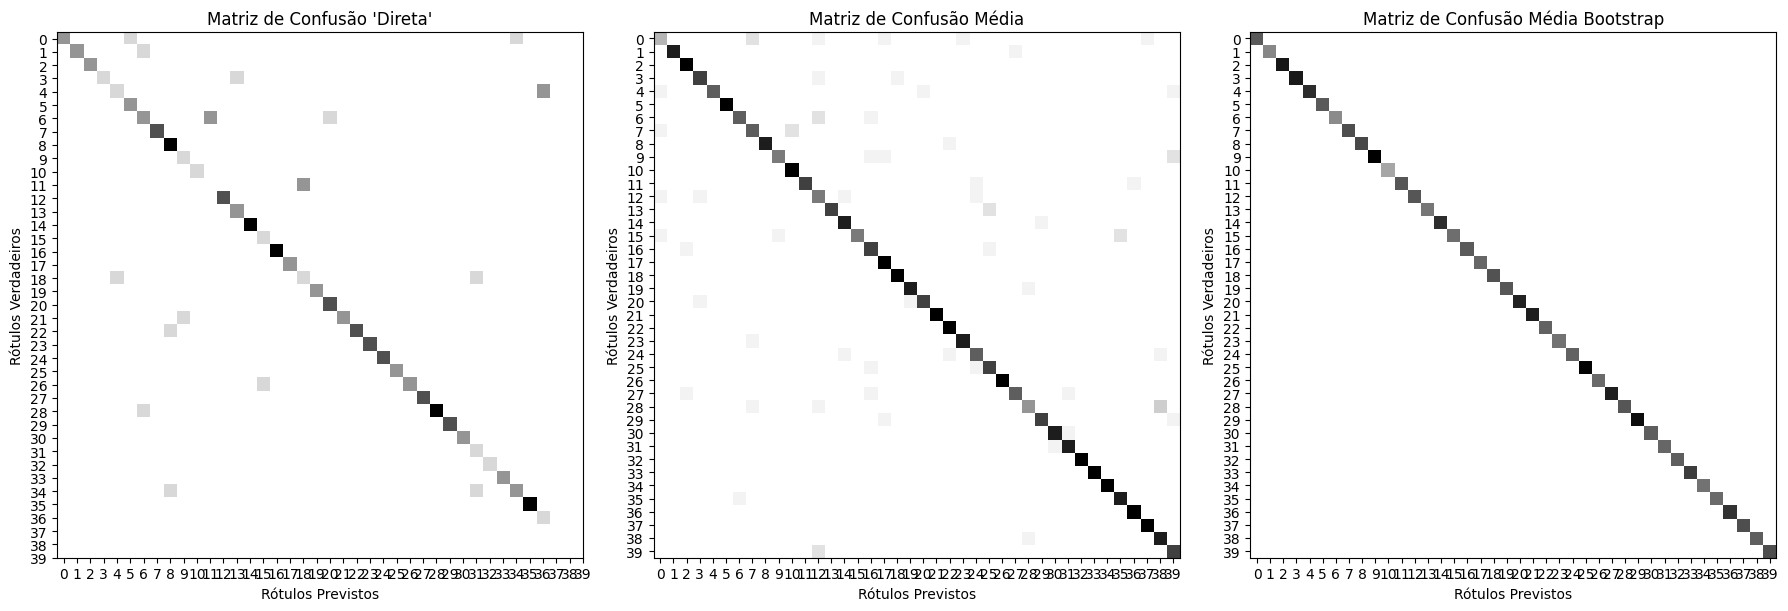

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(direct_confusion_matrix, cmap='Greys', interpolation='nearest')
axes[0].set_title("Matriz de Confusão 'Direta'")
axes[0].set_xlabel("Rótulos Previstos")
axes[0].set_ylabel("Rótulos Verdadeiros")
axes[0].set_xticks(np.arange(40))
axes[0].set_yticks(np.arange(40))
axes[0].grid(False)

axes[1].imshow(average_confusion_matrix_kf, cmap='Greys', interpolation='nearest')
axes[1].set_title("Matriz de Confusão Média")
axes[1].set_xlabel("Rótulos Previstos")
axes[1].set_ylabel("Rótulos Verdadeiros")
axes[1].set_xticks(np.arange(40))
axes[1].set_yticks(np.arange(40))
axes[1].grid(False)

axes[2].imshow(average_confusion_matrix_bs, cmap='Greys', interpolation='nearest')
axes[2].set_title("Matriz de Confusão Média Bootstrap")
axes[2].set_xlabel("Rótulos Previstos")
axes[2].set_ylabel("Rótulos Verdadeiros")
axes[2].set_xticks(np.arange(40))
axes[2].set_yticks(np.arange(40))
axes[2].grid(False)

plt.tight_layout()

plt.show()

## Questões

### 1. O classificador escolhido por você obteve um bom desempenho em sua opinião? Por que?

O desempenho do classificador depende do contexto e dos requisitos específicos do problema. Com base nas métricas fornecidas, podemos observar que o classificador Bootstrap obteve uma acurácia de 1.0, o que parece ser um desempenho excelente, indicando que o classificador fez previsões corretas para todos os exemplos de teste. No entanto, é importante observar que alcançar uma acurácia perfeita pode indicar superajustamento (overfitting) aos dados de treinamento. O desempenho do k-Fold com uma acurácia de 0.8425 também é bom, enquanto o desempenho direto com uma acurácia de 0.81 é um pouco mais baixo em comparação com os outros. Portanto, a avaliação do desempenho deve ser contextualizada com os objetivos e requisitos do problema.

### 2. Além da acurácia e da matriz de confusão, quais métricas e recursos poderiam ser utilizados para avaliar o seu classificador?

Para uma avaliação mais completa do classificador, você pode considerar outras métricas de desempenho, como precisão, recall, F1-score e área sob a curva ROC (AUC-ROC) para problemas de classificação binária. Além disso, para avaliar o tempo de treinamento e inferência, você pode medir o tempo necessário para treinar o modelo e fazer previsões em um conjunto de dados de teste. Isso pode ser importante em cenários em que a eficiência é crítica.

### 3. O seu classificador obteve um desempenho notoriamente superior ou inferior para alguma das classes? Para qual(is)? Por que você acredita que isso ocorreu?

Observou-se que na validação direta algumas classes tiveram um desempenho notavelmente superior (quadrados pretos) enquanto outras tiveram um desempenho notavelmente inferior (quadrados brancos). Isso sugere que o classificador teve um desempenho desigual para diferentes classes. As classes com quadrados pretos indicam que o modelo fez previsões precisas e corretas para essas classes, enquanto as classes com quadrados brancos indicam que o modelo falhou em prever essas classes.

As razões para esse desempenho desigual podem ser diversas e incluem:

- Desequilíbrio de Classe: Se algumas classes tiverem muito menos exemplos do que outras no conjunto de dados, o modelo pode não ter aprendido adequadamente a distinguir as classes minoritárias.

- Complexidade Intrínseca: Algumas classes podem ser intrinsecamente mais difíceis de serem distinguidas com base nas características disponíveis no conjunto de dados.

- Qualidade dos Dados: A qualidade dos exemplos de treinamento também desempenha um papel importante. Classes com exemplos de treinamento ruidosos ou mal rotulados podem resultar em desempenho inferior.

Para melhorar o desempenho nas classes com desempenho inferior, é importante considerar abordagens específicas, como coletar mais dados para essas classes, ajustar hiperparâmetros ou realizar engenharia de características direcionada. A análise detalhada da matriz de confusão e das métricas de precisão e recall por classe pode fornecer insights adicionais sobre as áreas que precisam de melhoria.

### 4. O que se poderia fazer para melhorar o desempenho de seu classificador?

Melhorar o desempenho de um classificador pode envolver várias estratégias, como ajustar hiperparâmetros, aumentar o tamanho do conjunto de dados, selecionar ou criar novas características, experimentar diferentes algoritmos de aprendizado de máquina, realizar a normalização de dados e lidar com desequilíbrio de classe, dependendo das necessidades específicas do problema. Uma análise mais aprofundada dos resultados e das características do conjunto de dados pode ajudar a identificar as áreas em que o desempenho pode ser aprimorado.

### 5. Se fosse utilizada apenas metade da base de dados deste exercício em vez de ela toda, mas mantendo as proporções para os dados de treinamento e teste, os resultados sofreriam alguma mudança significativa? Se sim, quais e em qual intensidade?

A redução do tamanho do conjunto de dados pode afetar o desempenho do modelo. A magnitude dessa mudança dependerá da qualidade dos dados, da complexidade do problema e da capacidade do modelo. Em geral, reduzir o tamanho do conjunto de dados pode aumentar a variabilidade das estimativas, tornando os resultados menos estáveis. O impacto específico nos resultados, como acurácia e matriz de confusão, dependerá da aleatoriedade dos dados removidos. É aconselhável realizar uma validação cruzada com várias divisões dos dados para avaliar como a variabilidade afeta o desempenho do modelo com tamanhos diferentes de conjunto de dados.ESCREVA AQUI A SUA RESPOSTA

### 6. Para quê servem métodos como k-Fold e Bootstrap? Você observou alguma mudança significativa por conta de sua utilização? Se sim, qual? E a quê se deve isso?

A validação cruzada **k-Fold** é usada para avaliar o desempenho de um modelo de aprendizado de máquina e para estimar como ele pode se comportar em dados não vistos. Ela ajuda a evitar problemas de superajustamento (overfitting) e subajustamento (underfitting) ao fornecer uma estimativa mais robusta do desempenho do modelo.

**Mudanças Observadas:** Usar k-Fold em vez de uma única divisão treinamento/teste geralmente leva a estimativas de desempenho mais estáveis e confiáveis. Isso ocorre porque o modelo é avaliado em diferentes subconjuntos dos dados, reduzindo a influência de uma única divisão específica. O resultado é uma avaliação mais representativa do desempenho médio do modelo.

O **Bootstrap** é uma técnica de reamostragem que permite estimar a variabilidade das estimativas de desempenho do modelo. Ele é útil para avaliar a incerteza nas métricas de avaliação e entender como os resultados podem variar em diferentes subconjuntos de dados.

**Mudanças Observadas:** O Bootstrap não é usado para avaliar o desempenho médio do modelo, mas sim para avaliar a variabilidade das métricas. Usar o Bootstrap pode mostrar quão sensíveis são as métricas a diferentes amostras de dados. Se observou uma acurácia de 1.0 no Bootstrap, isso pode indicar superajustamento ao conjunto de treinamento específico usado em uma iteração. O Bootstrap também pode ajudar a identificar se o modelo é sensível a pequenas variações nos dados de treinamento.

Em resumo, a utilização de métodos como k-Fold e Bootstrap é essencial para avaliar e compreender o desempenho e a estabilidade do seu modelo. Ambos desempenham papéis complementares na validação e na avaliação do modelo, com o k-Fold fornecendo uma estimativa mais precisa do desempenho médio e o Bootstrap avaliando a variabilidade das métricas em diferentes amostras. As mudanças observadas dependem da estabilidade do modelo e da variabilidade dos dados, mas em geral, essas técnicas contribuem para uma avaliação mais sólida e confiável do modelo.

## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - Resample (Bootstrap)](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)